<a href="https://colab.research.google.com/github/sguo2020/100-days-of-Code/blob/main/Google_Play_Store_App_Analytics_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [64]:
import pandas as pd


# Notebook Presentation

In [65]:
# Show numeric output in decimal format e.g., 2.15

# Read the Dataset

In [66]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [67]:
df_apps.shape

(10841, 12)

In [68]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


In [69]:
df_apps.sample(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
9491,Sun Rise Free Live Wallpaper,PERSONALIZATION,4.3,86481,8.6,"10,000,000",Free,0,Everyone,Personalization,"January 31, 2018",4.0 and up
9404,"Any.do: To-do list, Calendar, Reminders & Planner",PRODUCTIVITY,4.5,298854,4.0,"10,000,000",Free,0,Everyone,Productivity,"August 5, 2018",Varies with device
9480,AT&T Mobile Transfer,PRODUCTIVITY,4.6,22775,26.0,"10,000,000",Free,0,Everyone,Productivity,"July 31, 2018",4.4 and up
3579,LIVE VIDEO TALK,DATING,4.7,478,4.5,"10,000",Free,0,Mature 17+,Dating,"June 28, 2018",4.0.3 and up
10824,Google Drive,PRODUCTIVITY,4.4,2731171,4.0,"1,000,000,000",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device
9267,Walmart,SHOPPING,4.4,441473,9.3,"10,000,000",Free,0,Everyone,Shopping,"July 30, 2018",Varies with device
7900,Z Champions,GAME,4.7,96028,59.0,"1,000,000",Free,0,Teen,Arcade,"May 28, 2018",4.0 and up
2746,BR Video Player,VIDEO_PLAYERS,4.0,46,3.1,"5,000",Free,0,Everyone,Video Players & Editors,"April 20, 2015",3.0 and up
7499,3D DJ – DJ Mixer 2018,FAMILY,4.3,6333,30.0,"1,000,000",Free,0,Everyone,Entertainment,"May 25, 2018",5.0 and up
1372,DV KING 4K,PHOTOGRAPHY,2.3,3,8.5,100,Free,0,Everyone,Photography,"July 17, 2018",4.0 and up


In [70]:
df_apps.isna().values.sum()
df_apps_clean = df_apps.dropna()

### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [71]:
df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [72]:
df_apps_clean.shape

(9365, 12)

In [73]:
df_apps_clean.isna().values.sum()

0

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [74]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]

In [75]:
print(duplicated_rows.shape)
duplicated_rows.head()

(474, 12)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
946,420 BZ Budeze Delivery,MEDICAL,5.0,2,11.0,100,Free,0,Mature 17+,Medical,"June 6, 2018",4.1 and up
1133,MouseMingle,DATING,2.7,3,3.9,100,Free,0,Mature 17+,Dating,"July 17, 2018",4.4 and up
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6.5,100,Paid,$12.99,Everyone,Medical,"July 25, 2018",3.0 and up
1231,Sway Medical,MEDICAL,5.0,3,22.0,100,Free,0,Everyone,Medical,"July 25, 2018",5.0 and up
1247,Chat Kids - Chat Room For Kids,DATING,4.7,6,4.9,100,Free,0,Mature 17+,Dating,"July 24, 2018",4.0.3 and up


In [76]:
df_apps_clean[df_apps_clean.App=='MouseMingle']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
1132,MouseMingle,DATING,2.7,3,3.9,100,Free,0,Mature 17+,Dating,"July 17, 2018",4.4 and up
1133,MouseMingle,DATING,2.7,3,3.9,100,Free,0,Mature 17+,Dating,"July 17, 2018",4.4 and up


In [77]:
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])

In [78]:
df_apps_clean.shape

(8197, 12)

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [79]:
df_apps_clean.loc[df_apps_clean.Rating.idxmax()]

App               KBA-EZ Health Guide
Category                      MEDICAL
Rating                            5.0
Reviews                             4
Size_MBs                         25.0
Installs                            1
Type                             Free
Price                               0
Content_Rating               Everyone
Genres                        Medical
Last_Updated           August 2, 2018
Android_Ver              4.0.3 and up
Name: 21, dtype: object

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [80]:
df_size = df_apps_clean.sort_values('Size_MBs', ascending=False)
df_size[:5]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",4.0 and up
10687,Hungry Shark Evolution,GAME,4.5,6074334,100.0,"100,000,000",Free,0,Teen,Arcade,"July 25, 2018",4.1 and up
9943,Miami crime simulator,GAME,4.0,254518,100.0,"10,000,000",Free,0,Mature 17+,Action,"July 9, 2018",4.0 and up
9944,Gangster Town: Vice District,FAMILY,4.3,65146,100.0,"10,000,000",Free,0,Mature 17+,Simulation,"May 31, 2018",4.0 and up
3144,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100.0,"5,000",Free,0,Everyone,Health & Fitness,"August 2, 2018",5.0 and up


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [81]:
df_reviews = df_apps_clean.sort_values('Reviews', ascending=False)
df_reviews[:50]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
10805,Facebook,SOCIAL,4.1,78158306,5.30,"1,000,000,000",Free,0,Teen,Social,"August 3, 2018",Varies with device
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication,"August 3, 2018",Varies with device
10806,Instagram,SOCIAL,4.5,66577313,5.30,"1,000,000,000",Free,0,Teen,Social,"July 31, 2018",Varies with device
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication,"August 1, 2018",Varies with device
10650,Clash of Clans,GAME,4.6,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy,"July 15, 2018",4.1 and up
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,3.40,"500,000,000",Free,0,Everyone,Tools,"August 3, 2018",Varies with device
10835,Subway Surfers,GAME,4.5,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade,"July 12, 2018",4.1 and up
10828,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,3.40,"500,000,000",Free,0,Everyone,Tools,"August 4, 2018",Varies with device
10584,Clash Royale,GAME,4.6,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy,"June 27, 2018",4.1 and up


In [82]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8197 entries, 10805 to 742
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8197 non-null   object 
 1   Category        8197 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         8197 non-null   int64  
 4   Size_MBs        8197 non-null   float64
 5   Installs        8197 non-null   object 
 6   Type            8197 non-null   object 
 7   Price           8197 non-null   object 
 8   Content_Rating  8197 non-null   object 
 9   Genres          8197 non-null   object 
 10  Last_Updated    8197 non-null   object 
 11  Android_Ver     8197 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 832.5+ KB


In [83]:
df_reviews.Installs = df_reviews.Installs.astype(str).str.replace(',','')
df_reviews.Installs = pd.to_numeric(df_reviews.Installs)
df_reviews[['App','Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,697
5000,425
10000,987


In [84]:
df_reviews.Price = df_reviews.Price.astype(str).str.replace('$','')
df_reviews.Price = pd.to_numeric(df_reviews.Price)
price = df_reviews[['App','Price']].groupby('Price').count()
price.tail(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App
Price,
14.00,1
14.99,8
15.46,1
15.99,1
16.99,2
17.99,2
18.99,1
19.40,1
19.99,4


In [85]:
df_reviews = df_reviews[df_reviews.Price<250]
df_reviews.head()
# df_reviews = df_reviews.drop(['Last_Updated','Android_Ver'], axis=1, inplace=True)
# df_reviews.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
10805,Facebook,SOCIAL,4.1,78158306,5.3,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.5,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device
10806,Instagram,SOCIAL,4.5,66577313,5.3,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.5,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device
10650,Clash of Clans,GAME,4.6,44891723,98.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",4.1 and up


In [86]:
df_reviews.drop(['Last_Updated','Android_Ver'], axis=1, inplace=True)
df_reviews.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.1,78158306,5.3,1000000000,Free,0.0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.5,1000000000,Free,0.0,Everyone,Communication
10806,Instagram,SOCIAL,4.5,66577313,5.3,1000000000,Free,0.0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.5,1000000000,Free,0.0,Everyone,Communication
10650,Clash of Clans,GAME,4.6,44891723,98.0,100000000,Free,0.0,Everyone 10+,Strategy


In [87]:
df_reviews.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.0,6,1.3,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.2,134,1.8,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.5,214,68.0,1000,Paid,33.99,Everyone,Medical
4264,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25.0,50000,Paid,29.99,Everyone,Sports
504,AP Art History Flashcards,FAMILY,5.0,1,96.0,10,Paid,29.99,Mature 17+,Education
2207,EMT PASS,MEDICAL,3.4,51,2.4,1000,Paid,29.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.2,64,41.0,1000,Paid,29.99,Everyone,Medical
3241,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.2,168,25.0,10000,Paid,24.99,Everyone,Medical
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25.0,100000,Paid,24.99,Everyone,Medical


In [88]:
df_reviews['Revenue_Estimate'] = df_reviews.Installs.mul(df_reviews.Price)
df_reviews.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
10805,Facebook,SOCIAL,4.1,78158306,5.3,1000000000,Free,0.0,Teen,Social,0.0
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.5,1000000000,Free,0.0,Everyone,Communication,0.0
10806,Instagram,SOCIAL,4.5,66577313,5.3,1000000000,Free,0.0,Teen,Social,0.0
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.5,1000000000,Free,0.0,Everyone,Communication,0.0
10650,Clash of Clans,GAME,4.6,44891723,98.0,100000000,Free,0.0,Everyone 10+,Strategy,0.0


In [89]:
df_reviews.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.5,2376564,19.000000,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,69900000.0
8825,Hitman Sniper,GAME,4.6,408292,29.000000,10000000,Paid,0.99,Mature 17+,Action,9900000.0
7151,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.000000,1000000,Paid,6.99,Mature 17+,Action,6990000.0
7477,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48.000000,1000000,Paid,5.99,Everyone,Photography,5990000.0
7977,Sleep as Android Unlock,LIFESTYLE,4.5,23966,0.851562,1000000,Paid,5.99,Everyone,Lifestyle,5990000.0
6594,DraStic DS Emulator,GAME,4.6,87766,12.000000,1000000,Paid,4.99,Everyone,Action,4990000.0
6082,Weather Live,WEATHER,4.5,76593,4.750000,500000,Paid,5.99,Everyone,Weather,2995000.0
7633,Five Nights at Freddy's,GAME,4.6,100805,50.000000,1000000,Paid,2.99,Teen,Action,2990000.0
7044,Tasker,TOOLS,4.6,43045,3.400000,1000000,Paid,2.99,Everyone,Tools,2990000.0
6856,Threema,COMMUNICATION,4.5,51110,3.500000,1000000,Paid,2.99,Everyone,Communication,2990000.0


In [90]:
import plotly.express as px

Scatter = px.scatter(x=df_reviews.Category, y=df_reviews.Installs, title='Category Installs')
Scatter.show()

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [91]:
df_reviews.Category.nunique()

33

In [92]:
category = df_reviews.Category.value_counts()[:10]
# category.sort_values(index)
category.head(10)

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
LIFESTYLE           297
PERSONALIZATION     296
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

In [93]:
cat_number = df_reviews.groupby('Category').agg({'App':pd.Series.count})

cat_number.head(10)

,App
Category,
ART_AND_DESIGN,61
AUTO_AND_VEHICLES,73
BEAUTY,42
BOOKS_AND_REFERENCE,169
BUSINESS,262
COMICS,54
COMMUNICATION,257
DATING,134
EDUCATION,118


In [94]:
category_download = df_reviews.groupby('Category').agg({'Installs':pd.Series.sum})
category_download.head()

,Installs
Category,
ART_AND_DESIGN,114233100
AUTO_AND_VEHICLES,53129800
BEAUTY,26916200
BOOKS_AND_REFERENCE,1665791655
BUSINESS,692018120


In [95]:
category_download.sort_values('Installs', ascending=True, inplace=True)
category_download.head()

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100


In [96]:
h_bar = px.bar(x=category_download.Installs, y=category_download.index, orientation='h', title='Category Popularity')
h_bar.show()

In [97]:
h_bar = px.scatter(x=category_download.Installs, y=category_download.index, orientation='h', title='Category Popularity')
h_bar.show()

In [98]:
import plotly.express as px
bar = px.bar(x=category.index, y=category.values)
bar.show()

In [99]:
# Scatter = px.scatter(x=category.values, y=category_download.Installs, title='Category Installs')
# Scatter.show()

In [100]:
category.head()

FAMILY          1606
GAME             910
TOOLS            719
PRODUCTIVITY     301
LIFESTYLE        297
Name: Category, dtype: int64

In [101]:
category_download.head()

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100


In [102]:
cat_merge = pd.merge(cat_number, category_download, on='Category')
cat_merge.sort_values('Installs', ascending=False)

,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


In [103]:
scatter = px.scatter(cat_merge, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merge.index,
                    color='Installs')
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
scatter.show()

In [104]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index, hole=.6
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

NameError: ignored

In [115]:
df_reviews.head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
10805,Facebook,SOCIAL,4.1,78158306,5.30,1000000000,Free,0.0,Teen,Social,0.0
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.50,1000000000,Free,0.0,Everyone,Communication,0.0
10806,Instagram,SOCIAL,4.5,66577313,5.30,1000000000,Free,0.0,Teen,Social,0.0
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.50,1000000000,Free,0.0,Everyone,Communication,0.0
10650,Clash of Clans,GAME,4.6,44891723,98.00,100000000,Free,0.0,Everyone 10+,Strategy,0.0
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,3.40,500000000,Free,0.0,Everyone,Tools,0.0
10835,Subway Surfers,GAME,4.5,27722264,76.00,1000000000,Free,0.0,Everyone 10+,Arcade,0.0
10828,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,1000000000,Free,0.0,Teen,Video Players & Editors,0.0
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,3.40,500000000,Free,0.0,Everyone,Tools,0.0
10584,Clash Royale,GAME,4.6,23133508,97.00,100000000,Free,0.0,Everyone 10+,Strategy,0.0


In [106]:
df_reviews.Genres.describe()

count      8182
unique      114
top       Tools
freq        718
Name: Genres, dtype: object

In [107]:
df_reviews.Category.describe()

count       8182
unique        33
top       FAMILY
freq        1606
Name: Category, dtype: object

In [113]:
df_reviews.Genres.value_counts().sort_values(ascending=True).head(10)

Board;Pretend Play                   1
Music & Audio;Music & Video          1
Art & Design;Pretend Play            1
Comics;Creativity                    1
Travel & Local;Action & Adventure    1
Card;Brain Games                     1
Puzzle;Education                     1
Strategy;Education                   1
Racing;Pretend Play                  1
Lifestyle;Education                  1
Name: Genres, dtype: int64

In [118]:
# Split the strings on the semi-colon and then .stack them.
stack = df_reviews.Genres.str.split(";", expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8562,)
Number of genres: 53


In [123]:
num_genres.head()

Tools            719
Education        587
Entertainment    498
Action           304
Productivity     301
dtype: int64

<BarContainer object of 15 artists>

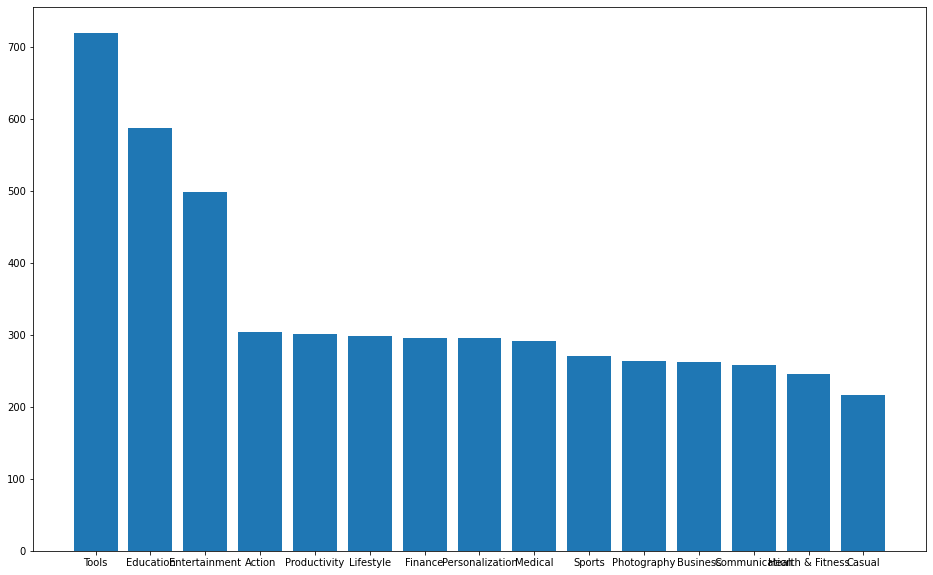

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.bar(num_genres[:15].index, num_genres[:15].values)

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

Free    7594
Paid     588
Name: Type, dtype: int64

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


### The most expensive apps sub $250

### Highest Grossing Paid Apps (ballpark estimate)

# Plotly Bar Charts & Scatter Plots: Analysing App Categories

### Vertical Bar Chart - Highest Competition (Number of Apps)

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [152]:
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
 
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [ ]:
 df_free_vs_paid = df_reviews.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
 df_free_vs_paid.sort_values('App', ascending=False, inplace=True)
df_free_vs_paid.head(20)

,Category,Type,App
19,FAMILY,Free,1456
25,GAME,Free,834
53,TOOLS,Free,656
21,FINANCE,Free,289
31,LIFESTYLE,Free,284
45,PRODUCTIVITY,Free,283
7,BUSINESS,Free,253
43,PHOTOGRAPHY,Free,248
51,SPORTS,Free,238
10,COMMUNICATION,Free,235


In [ ]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.